Nama Anggota Kelompok 8:

*   Laila Mustika Sari (11221002)
*   Alpian Roymundus Siringo-ringo (11211009)
*   Arief Reno Fathurrahman (11201014)

Dataset yang digunakan adalah hasil scrapping dari Review Aplikasi Tik-tok pada Google Playstore

Attribut:


1.   reviewId = Id dari akun reviewer
2.   userName = nama pengguna reviewer
3. userImage = foto pengguna
4. content = Isi konten review dari pengguna
5. score = nilai rating yang diberikan pengguna
6. thumbcount = banyak like dari komentar atau review pengguna
7. reviewcreatedVersion = versi aplikasi saat diberikan review oleh pengguna
8. at = waktu diberikan review
9. replycontent = balasan dari review
10. reliedat = waktu untuk balasan review
11. appVersion = versi dari aplikasi






# Scrapping Data

Di sini melakukan instalisasi dari library *google-play-scraper*  untuk digunakan dalam pengambilan data review di google playstore



In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00


Setelah itu, dilakukan proses scrapping data menggunakan library yang sudah diinstal sebelumnya.

In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.zhiliaoapp.musically',
    lang='id',  # Indonesian language
    country='id',  # Country code for Indonesia
    sort=Sort.NEWEST,  # Sort by newest reviews
    count=1000,  # Number of reviews to fetch (max is 1000)
    filter_score_with=None  # Fetch all scores (1 to 5)
)

In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [ ]:
df_tiktok = pd.DataFrame(np.array(result),columns=['result'])

df_tiktok = df_tiktok.join(pd.DataFrame(df_tiktok.pop('result').tolist()))

df_tiktok.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a14f7de4-f37e-42f1-a1dc-3001c6686926,Made Budiarsa,https://play-lh.googleusercontent.com/a/ACg8oc...,Sangat membantu,5,0,37.1.4,2024-11-07 20:38:10,None,None,37.1.4
1,d9371993-26d9-459e-ba8e-270d6aeeb61b,Benancio Lopes,https://play-lh.googleusercontent.com/a/ACg8oc...,Benansyu,2,0,None,2024-11-07 14:32:14,None,None,None
2,7608ccf2-d0d8-4dad-8d4f-3d5724b350c2,Eliana Da Concesaun,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus👍🏼👍🏼👍🏼,5,0,None,2024-11-07 07:51:47,None,None,None
3,cf40108d-d4f9-41ab-8df9-5b215775fe1b,Dian Se,https://play-lh.googleusercontent.com/a/ACg8oc...,Good,5,0,37.0.4,2024-11-07 05:38:41,None,None,37.0.4
4,e8f4d565-e76b-439e-9b93-229a691a8445,Bagus Syahputro,https://play-lh.googleusercontent.com/a/ACg8oc...,Ok,5,0,37.2.4,2024-11-07 05:29:45,None,None,37.2.4


In [ ]:
from google.colab import files

In [ ]:
df_tiktok.to_csv('tiktok.csv', index=False)
files.download('tiktok.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Import Modul

In [ ]:
import pandas as pd
import re

In [ ]:
df = pd.read_csv('/content/tiktok.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a14f7de4-f37e-42f1-a1dc-3001c6686926,Made Budiarsa,https://play-lh.googleusercontent.com/a/ACg8oc...,Sangat membantu,5,0,37.1.4,2024-11-07 20:38:10,NaN,NaN,37.1.4
1,d9371993-26d9-459e-ba8e-270d6aeeb61b,Benancio Lopes,https://play-lh.googleusercontent.com/a/ACg8oc...,Benansyu,2,0,NaN,2024-11-07 14:32:14,NaN,NaN,NaN
2,7608ccf2-d0d8-4dad-8d4f-3d5724b350c2,Eliana Da Concesaun,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus👍🏼👍🏼👍🏼,5,0,NaN,2024-11-07 07:51:47,NaN,NaN,NaN
3,cf40108d-d4f9-41ab-8df9-5b215775fe1b,Dian Se,https://play-lh.googleusercontent.com/a/ACg8oc...,Good,5,0,37.0.4,2024-11-07 05:38:41,NaN,NaN,37.0.4
4,e8f4d565-e76b-439e-9b93-229a691a8445,Bagus Syahputro,https://play-lh.googleusercontent.com/a/ACg8oc...,Ok,5,0,37.2.4,2024-11-07 05:29:45,NaN,NaN,37.2.4
...,...,...,...,...,...,...,...,...,...,...,...
995,f509a472-3f2d-47f6-a642-227e34c9a53a,Azita Cardoso,https://play-lh.googleusercontent.com/a/ACg8oc...,Baru mau pake aplikasi ini,5,0,NaN,2024-04-24 21:56:30,NaN,NaN,NaN
996,60ec6e60-59ef-4c88-b4a3-48eff1cf6984,Nhor Nhor,https://play-lh.googleusercontent.com/a/ACg8oc...,Ini aplikasi apaan gw ingin belanja di Shop ta...,5,4,30.0.3,2024-04-24 14:25:42,NaN,NaN,30.0.3
997,914bb69e-8262-4c4c-bab4-9a072be8e365,Editor berkelas,https://play-lh.googleusercontent.com/a-/ALV-U...,tiktok ya bagus banget,5,0,NaN,2024-04-24 09:25:31,NaN,NaN,NaN
998,5fa10079-725d-408c-8f64-d8276238848e,Timotius um,https://play-lh.googleusercontent.com/a-/ALV-U...,Mantap,5,0,34.4.4,2024-04-24 06:27:32,NaN,NaN,34.4.4


# Cleaning Data

In [ ]:
df = df[['userName', 'content', 'score']]

Mengambil 3 atribut yang relevan saja untuk digunakan dalam proses analisis sentimen

In [ ]:
df.shape

(1000, 3)

In [ ]:
df = df.drop_duplicates(subset=['content'])

Menghapus data yang duplicate pada kolom content

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.dropna()

menghapus baris data yang kosong

In [ ]:
df.isnull().sum()

,0
userName,0
content,0
score,0


In [ ]:
df.shape

(812, 3)

Berdasarkan output di atas, setelah dilakukan proses menghapus data yang duplicate dan baris data yang kosong, untuk banyak data berkurang dari 1000 menjadi 812.

In [ ]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['content'] = df['content'].apply(clean_twitter_text)

Melakukan pembersihan data yang masih terdapat noise, yang nantinya akan mengganggu proses analisis sentimen.

In [ ]:
df.to_csv("/content/hasil_cleaningData.csv")

menyimpan hasil pembersiihan

# Pra-Processing Data

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 11.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/hasil_cleaningData.csv", index_col=0)
df

,userName,content,score
0,Made Budiarsa,Sangat membantu,5
1,Benancio Lopes,Benansyu,2
2,Eliana Da Concesaun,Bagus,5
3,Dian Se,Good,5
4,Bagus Syahputro,Ok,5
...,...,...,...
994,EVOS Nune,makatzi yh apkny bagus,5
995,Azita Cardoso,Baru mau pake aplikasi ini,5
996,Nhor Nhor,Ini aplikasi apaan gw ingin belanja di Shop ta...,5
997,Editor berkelas,tiktok ya bagus banget,5


In [ ]:
df.shape


(812, 3)

# Filter Token

In [ ]:
def filter_tokens_by_length(dataframe, column, min_words, max_words):
    # Tokenisasi kata
    words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
    # Membuat filter untuk jumlah kata
    mask = (words_count >= min_words) & (words_count <= max_words)
    # Mengaplikasikan filter ke DataFrame
    filtered_df = dataframe[mask]
    return filtered_df

# Menggunakan filter_tokens_by_length untuk mendapatkan baris dengan jumlah kata antara 3 dan 50
min_words = 3
max_words = 50
df = filter_tokens_by_length(df, 'content', min_words, max_words)

In [ ]:
score = df['score']

In [ ]:
score

,score
5,5
6,1
10,5
12,1
15,5
...,...
994,5
995,5
996,5
997,5


In [ ]:
score.to_csv("/content/score.csv")

# Normalisasi

Melakukan Normalisasi pada beberapa kata dengan tujuan tidak ada kata-kata yang ambigu atau typo, sehingga nantinya bisa diproses dengan baik oleh komputer.


In [ ]:
# Normalisasi
norm = {' bagu' : 'bagus ',' yg ':' yang ', ' udh ':' udah ', 'wkwk ':' ', ' min ':' kak ', ' malem ':' malam', ' malem2 ':' malam ', ' sm ':' sama ', ' dy ':' dia ', ' lg ':' lagi ', ' skrg ':' sekarang ', ' ddpn ':' didepan ', ' makasi ':' makasih ', ' pertamaz ':' pertamax ', ' jg ':' juga ', ' donk ':' dong ', ' ikutann ':' ikutan ', ' banyakk ':' banyak ', ' twt ':' tweet', 'mantaap ':'mantap ', ' juarak':' juara ', 'daridulu ':'dari dulu ', 'siapp ':'siap ', ' gamau ':' tidak mau ', ' sll ':' selalu ', ' qu ':' aku ', ' krn ':' karena ', ' irii':' iri', ' muluu ':' terus ', 'mada ':'masa ', 'jgn ':'jangan ', ' jgn ':' jangan ', ' muluuu ':' terus ', 'ntar ':'nanti ', ' awtnya':' awetnya', 'gg ':'keren ', ' kerennn':' keren ', ' bisaa ':' bisa ', 'gaaa':'tidak ', " yg ": " yang ", ' nyampe':' sampai', ' nyampe ':' sampai ', ' lu ':' kamu ', ' ikhlaaasss ':' ikhlas ', ' gak ':' tidak ', ' klo ':' kalo ', ' amp ': ' sampai ', ' ga ':' tidak ', ' yaaaa':' ya ', 'betolll ':'betul ', ' kaga ':' tidak ', ' idk ':' tidak tahu ', ' jkt ':' jakarta ', ' lo ':' kamu ', ' bjir ':' ', ' kek ':' seperti ', ' yg ':' yang ', ' utk ':' untuk ', 'kismin ':'miskin ', ' kismin ':' miskin ', ' pd ':' pada ', ' dgn ':' dengan ', ' ituu ':' itu ', ' jg ':' juga ', 'yoi':'iya ', ' yoi ':' iya ', 'org2 ':'orang ', ' tak ':' tidak ', ' kyk ':' seperti ', ' sbg ':' sebagai ', ' anjjjj ':' ', ' bgt ':' banget ', 'km ':'kamu ', ' km ':' kamu', ' byk ':' banyak ', ' lg ':' lagi ', ' mrk ':' mereka ', ' blm ':' belum ', ' makatzi' : ' ', ' Bgus': 'bagus '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,Unnamed: 0,content,score,sentimen
0,0,puas pokok nyaklw upload video bayar bahagia rasa,5,positif
1,1,jelek intas terus,1,negatif
2,2,tiktok memang hibur,5,positif
3,3,tiktok makin kesini makin kesana bikin kesal a...,1,negatif
4,4,saya sangat senang aplikasi,5,positif
...,...,...,...,...
460,460,makatzi yh apknybagus s,5,positif
461,461,baru mau pake aplikasi,5,positif
462,462,ini aplikasi apa gw belanja shop tidak apk updat,5,positif
463,463,tiktokbagus s banget,5,positif


# Stopword

Stopword adala proses kata-kata umum dalam bahasa yang biasanya tidak membawa makna yang signifikan dalam analisis teks dan sering diabaikan dalam pemrosesan teks, seperti dalam analisis sentimen, pencarian informasi, atau pemodelan topik. Contoh kata stopword dalam bahasa Indonesia meliputi: "yang," "dan," "di," "ke," "untuk," "adalah," dan lain-lain.

In [ ]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))
df.head()

,Unnamed: 0,content,score,sentimen
0,0,puas pokok nyaklw upload video bayar bahagia rasa,5,positif
1,1,jelek intas terus,1,negatif
2,2,tiktok memang hibur,5,positif
3,3,tiktok makin kesini makin kesana bikin kesal a...,1,negatif
4,4,sangat senang aplikasi,5,positif


# Tokenize

Tokenisasi adalah proses memecah teks menjadi unit-unit yang lebih kecil yang disebut token. Token ini dapat berupa kata, frasa, atau bahkan karakter, tergantung pada tujuan analisis. Tokenisasi adalah langkah penting dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan digunakan sebagai dasar untuk berbagai aplikasi, termasuk analisis teks, analisis sentimen, dan pemodelan topik.

In [ ]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

,content
0,"[puas, pokok, nyaklw, upload, video, bayar, ba..."
1,"[jelek, intas, terus]"
2,"[tiktok, memang, hibur]"
3,"[tiktok, makin, kesini, makin, kesana, bikin, ..."
4,"[sangat, senang, aplikasi]"
...,...
460,"[makatzi, yh, apknybagus, s]"
461,"[baru, mau, pake, aplikasi]"
462,"[aplikasi, apa, gw, belanja, shop, apk, updat]"
463,"[tiktokbagus, s, banget]"


# Stemming

Stemming digunakan untuk menghilangkan akhiran, imbuhan, atau variasi lain dari kata untuk mendapatkan bentuk dasarnya, sehingga memudahkan analisis teks dan pemahaman makna.

In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/hasil_preprocessingData.csv", index=False)

puas pokok nyaklw upload video bayar bahagia rasa
jelek intas terus
tiktok memang hibur
tiktok makin kesini makin kesana bikin kesal aplikasi sekarang
sangat senang aplikasi
bagus vidio lucu
kerja tuk las mikanik mesin
komen foto
tiktok jaring stabil
knapa tiktok gk nonton live
bagusbersyukur aplikasi medsos inimantap
download aplikasi templatenya anggak muncul baik
sangatbagus s tarik suka sangat bantu
bagus banget gilaaak seruuu cuy
emang babi padahal akun baru aku buat ikut penguna bukan aku alami
lama lpadingnya njierrr
aplikasi nia sanga kesan niesal uda donlowod
aplikasi sekarang buat nyaman buka tiktok selalu henti logo lalu hp jadi lot padahal ram 6gb internal 128gb space kosong banyak ira awal hp rusak nyata aplikasi buat hp rusak
manfaat sekali coba vidio upload ngga banyak tonton bayar arti juga giat2 mengupload sekaligus ajar konten kreator terimakasih
tiktok sering buka aplikasi tiktok selalu hapus download kalau live ad pembritauan tonton batas tau info nya kendala dimna


In [ ]:
tokenized

,content
0,puas pokok nyaklw upload video bayar bahagia rasa
1,jelek intas terus
2,tiktok memang hibur
3,tiktok makin kesini makin kesana bikin kesal a...
4,sangat senang aplikasi
...,...
460,makatzi yh apknybagus s
461,baru mau pake aplikasi
462,aplikasi apa gw belanja shop apk updat
463,tiktokbagus s banget


# Gabungkan Data

In [ ]:
df = pd.read_csv('/content/hasil_preprocessingData.csv')
score = pd.read_csv('/content/score.csv')
score.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
# Menggabungkan kedua DataFrame berdasarkan index
merged_df = pd.concat([df, score], axis=1)


In [ ]:
merged_df

,content,score
0,puas pokok nyaklw upload video bayar bahagia rasa,5
1,jelek intas terus,1
2,tiktok memang hibur,5
3,tiktok makin kesini makin kesana bikin kesal a...,1
4,sangat senang aplikasi,5
...,...,...
460,makatzi yh apknybagus s,5
461,baru mau pake aplikasi,5
462,aplikasi apa gw belanja shop apk updat,5
463,tiktokbagus s banget,5


In [ ]:
merged_df.to_csv("/content/hasil_preprocessingContentScore.csv")

In [ ]:
df = pd.read_csv('/content/hasil_preprocessingContentScore.csv')
df

,Unnamed: 0,content,score
0,0,puas pokok nyaklw upload video bayar bahagia rasa,5
1,1,jelek intas terus,1
2,2,tiktok memang hibur,5
3,3,tiktok makin kesini makin kesana bikin kesal a...,1
4,4,sangat senang aplikasi,5
...,...,...,...
460,460,makatzi yh apknybagus s,5
461,461,baru mau pake aplikasi,5
462,462,aplikasi apa gw belanja shop apk updat,5
463,463,tiktokbagus s banget,5


# Labeling

Metode labeling pada kasus ini menggunakan nilai score atau rating dari pengguna


In [ ]:
def label_sentiment(score):
    if score <= 3:
        return 'negatif'
    # elif score == 3:
    #     return 'netral'
    else:
        return 'positif'

df['sentimen'] = df['score'].apply(label_sentiment)

In [ ]:
sentimen_counts = df.sentimen.value_counts()
sentimen_counts

,count
sentimen,
positif,297
negatif,168


# Data Imbalance

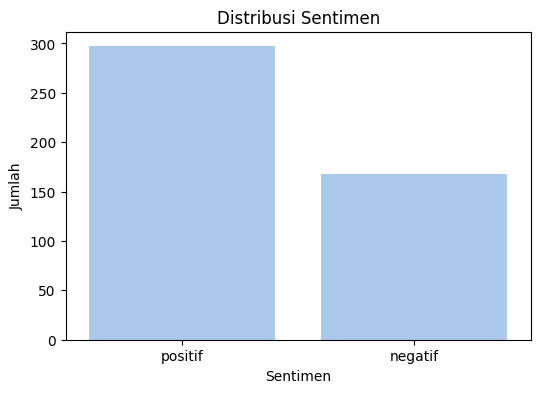

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(6, 4))
sns.countplot(x='sentimen', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

Pada Hasil visualisasi ini, tidak terdapat data imbalance, yang mana kompsisi sentimen positif dan negatif tidak terlalu jauh.


In [ ]:
data_negatif = df[df['sentimen'] == 'negatif']
data_positif = df[df['sentimen'] == 'positif']

# Visualisasi Data

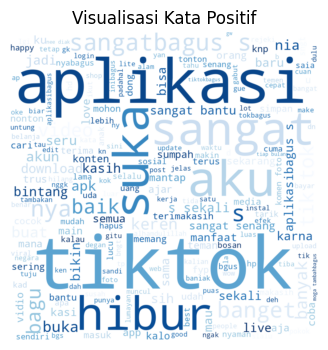

In [ ]:
all_text_s1 = ' '.join(word for word in data_positif["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

Pada bagian ini terlihat beberapa kata yang sering muncul untuk sentimen positif.


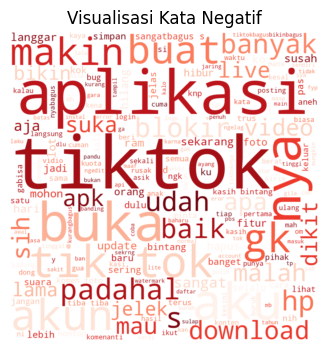

In [ ]:
all_text_s0 = ' '.join(word for word in data_negatif["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

Pada bagian ini, diperlihatkan beberapa kata yang sering muncul pada sentimen negatif.

# Pembagian Data

In [ ]:
X=df.content
y=df.sentimen

Pada bagian ini, data dibagi dengan perbanding Training : Testing adalah 80:20

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 372
Banyak data x_test  : 93
Banyak data y_train : 372
Banyak data y_test  : 93


Berikut ini adalah jumlah untuk masing-masing Data Training dan Data Testing

#Training Data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf1 = SVC(kernel="linear")
clf2 = MultinomialNB()
clf3 = RandomForestClassifier()

In [ ]:
from sklearn.pipeline import Pipeline

model1 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])

In [ ]:
model1.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [ ]:
hasil1=model1.predict(x_test)

In [ ]:
matrix = classification_report(y_test,hasil1)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.61      0.44      0.51        39
     positif       0.66      0.80      0.72        54

    accuracy                           0.65        93
   macro avg       0.63      0.62      0.62        93
weighted avg       0.64      0.65      0.63        93



In [ ]:
model2.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [ ]:
hasil2=model2.predict(x_test)

In [ ]:
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.67      0.15      0.25        39
     positif       0.61      0.94      0.74        54

    accuracy                           0.61        93
   macro avg       0.64      0.55      0.49        93
weighted avg       0.63      0.61      0.53        93



In [ ]:
model3.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
hasil3=model3.predict(x_test)

In [ ]:
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.70      0.36      0.47        39
     positif       0.66      0.89      0.76        54

    accuracy                           0.67        93
   macro avg       0.68      0.62      0.62        93
weighted avg       0.68      0.67      0.64        93



In [ ]:
hasilDecisionTreeClassifier = accuracy_score(hasil1, y_test)
precision1 = precision_score(y_test, hasil1, average='weighted')
recall1 = recall_score(y_test, hasil1, average='weighted')
f1_1 = f1_score(y_test, hasil1, average='weighted')

hasilMultinomialNB = accuracy_score(hasil2, y_test)
precision2 = precision_score(y_test, hasil2, average='weighted')
recall2 = recall_score(y_test, hasil2, average='weighted')
f1_2 = f1_score(y_test, hasil2, average='weighted')

hasilRandomForestClassifier = accuracy_score(hasil3, y_test)
precision3 = precision_score(y_test, hasil3, average='weighted')
recall3 = recall_score(y_test, hasil3, average='weighted')
f1_3 = f1_score(y_test, hasil3, average='weighted')

In [ ]:
model = {'Model':['Decision Tree Classifier',
                  'Multinomial Naive Bayes',
                  'Random Forest Classifier',
                 ],
         'AccuracyScore':[hasilDecisionTreeClassifier, hasilMultinomialNB, hasilRandomForestClassifier],
         'Precision':[precision1, precision2, precision3],
         'Recall':[recall1, recall2, recall3],
         'F1-Score':[f1_1, f1_2, f1_3]
         }
model_df = pd.DataFrame(model)
model_df

,Model,AccuracyScore,Precision,Recall,F1-Score
0,Decision Tree Classifier,0.645161,0.638727,0.645161,0.632433
1,Multinomial Naive Bayes,0.612903,0.632104,0.612903,0.534011
2,Random Forest Classifier,0.666667,0.675342,0.666667,0.637929


# Testing

In [ ]:
def classify_text(input_text):
    models = [
        ('DecisionTreeClassifier', model_decisionTree),
        ('MultinomialNB', model_multinomialNaiveBayes),
        ('RandomForestClassifier', model_randomForest)
    ]

    results = {}

    for name, model in models:
        prediction = model.predict([input_text])
        results[name] = prediction[0]

    return results

In [ ]:
model_decisionTree = model1.fit(x_train, y_train)
model_multinomialNaiveBayes = model2.fit(x_train, y_train)
model_randomForest = model3.fit(x_train, y_train)

In [ ]:
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")

results = classify_text(input_text)

print("Input kata :", input_text)

print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

Masukkan teks yang ingin diklasifikasikan: tiktok jelek
Input kata : tiktok jelek

Hasil Klasifikasi:
DecisionTreeClassifier: negatif
MultinomialNB: negatif
RandomForestClassifier: negatif
